## Medical Insurance Fraud Detection

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Importing the necessaey libraries

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler

In [4]:
df=pd.read_csv('MedicalFraud1.csv')
df.head()
df.columns


Index(['creditLimit', 'availableMoney', 'transactionDateTime',
       'transactionAmount', 'merchantName', 'acqCountry',
       'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'currentExpDate', 'accountOpenDate',
       'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
       'transactionType', 'currentBalance', 'cardPresent',
       'expirationDateKeyInMatch', 'Fraud'],
      dtype='object')

## Data Preprocessing

In [96]:
columns_to_clean = ['transactionDateTime', 'currentExpDate', 'accountOpenDate', 'dateOfLastAddressChange']

for col in columns_to_clean:
    df[col] = df[col].str.replace('-', '').str.replace(':', '').str.replace(' ', '')


df.head()

,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,Fraud
0,0.095477,0.117744,130820161427,0.048992,2085,3,3,2.0,1.0,17,...,14032015,14032015,0.349666,0.414830,0.180336,1,0.0,0,0,0
1,0.095477,0.117744,111020160505,0.037041,27,3,3,9.0,1.0,3,...,14032015,14032015,0.429844,0.486974,0.076715,1,0.0,1,0,0
2,0.095477,0.117744,081120160918,0.003714,1304,3,3,9.0,1.0,12,...,14032015,14032015,0.429844,0.486974,0.076715,1,0.0,0,0,0
3,0.095477,0.117744,101220160214,0.003714,1304,3,3,9.0,1.0,12,...,14032015,14032015,0.429844,0.486974,0.076715,1,0.0,0,0,0
4,0.095477,0.117744,240320162104,0.035386,2083,3,3,2.0,1.0,4,...,06082015,06082015,0.874165,0.886774,0.314363,1,0.0,1,0,0


In [72]:
df.isnull().sum()

creditLimit                    0
availableMoney                 0
transactionDateTime            0
transactionAmount              0
merchantName                   0
acqCountry                  4562
merchantCountryCode          724
posEntryMode                4054
posConditionCode             409
merchantCategoryCode           0
currentExpDate                 0
accountOpenDate                0
dateOfLastAddressChange        0
cardCVV                        0
enteredCVV                     0
cardLast4Digits                0
transactionType              698
currentBalance                 0
cardPresent                    0
expirationDateKeyInMatch       0
Fraud                          0
dtype: int64

In [73]:
scaler = MinMaxScaler()
columns_to_scale = ["creditLimit", "availableMoney", "transactionAmount", "cardCVV", "enteredCVV", "cardLast4Digits", "currentBalance"]
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
df = df.dropna()
df.head()

,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,Fraud
0,0.095477,0.117744,130820161427,0.048992,Uber,US,US,2.0,1.0,rideshare,...,14032015,14032015,0.349666,0.414830,0.180336,PURCHASE,0.0,0,0,0
1,0.095477,0.117744,111020160505,0.037041,AMC #191138,US,US,9.0,1.0,entertainment,...,14032015,14032015,0.429844,0.486974,0.076715,PURCHASE,0.0,1,0,0
2,0.095477,0.117744,081120160918,0.003714,Play Store,US,US,9.0,1.0,mobileapps,...,14032015,14032015,0.429844,0.486974,0.076715,PURCHASE,0.0,0,0,0
3,0.095477,0.117744,101220160214,0.003714,Play Store,US,US,9.0,1.0,mobileapps,...,14032015,14032015,0.429844,0.486974,0.076715,PURCHASE,0.0,0,0,0
4,0.095477,0.117744,240320162104,0.035386,Tim Hortons #947751,US,US,2.0,1.0,fastfood,...,06082015,06082015,0.874165,0.886774,0.314363,PURCHASE,0.0,1,0,0


In [97]:
# from sklearn.preprocessing import LabelEncoder
# le=LabelEncoder()

# df['merchantName']=le.fit_transform(df['merchantName'])
# df['transactionType']=le.fit_transform(df['transactionType'])
# df['merchantCategoryCode']=le.fit_transform(df['merchantCategoryCode'])
# df['acqCountry']=le.fit_transform(df['acqCountry'])

# df.head()

In [98]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

columns_to_encode = ['merchantName', 'transactionType', 'merchantCategoryCode', 'acqCountry', 'merchantCountryCode']
for col in columns_to_encode:
    df[col] = le.fit_transform(df[col])

df.head()

,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,Fraud
0,0.095477,0.117744,130820161427,0.048992,2085,3,3,2.0,1.0,17,...,14032015,14032015,0.349666,0.414830,0.180336,1,0.0,0,0,0
1,0.095477,0.117744,111020160505,0.037041,27,3,3,9.0,1.0,3,...,14032015,14032015,0.429844,0.486974,0.076715,1,0.0,1,0,0
2,0.095477,0.117744,081120160918,0.003714,1304,3,3,9.0,1.0,12,...,14032015,14032015,0.429844,0.486974,0.076715,1,0.0,0,0,0
3,0.095477,0.117744,101220160214,0.003714,1304,3,3,9.0,1.0,12,...,14032015,14032015,0.429844,0.486974,0.076715,1,0.0,0,0,0
4,0.095477,0.117744,240320162104,0.035386,2083,3,3,2.0,1.0,4,...,06082015,06082015,0.874165,0.886774,0.314363,1,0.0,1,0,0


## Data Visualization

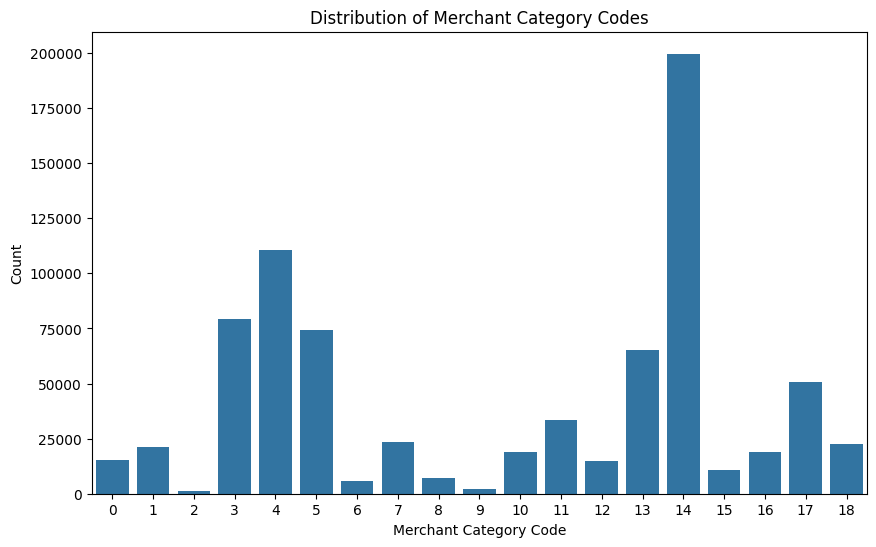

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar Plot for Categorical Data
plt.figure(figsize=(10, 6))
sns.countplot(x='merchantCategoryCode', data=df)
plt.title('Distribution of Merchant Category Codes')
plt.xlabel('Merchant Category Code')
plt.ylabel('Count')
plt.show()


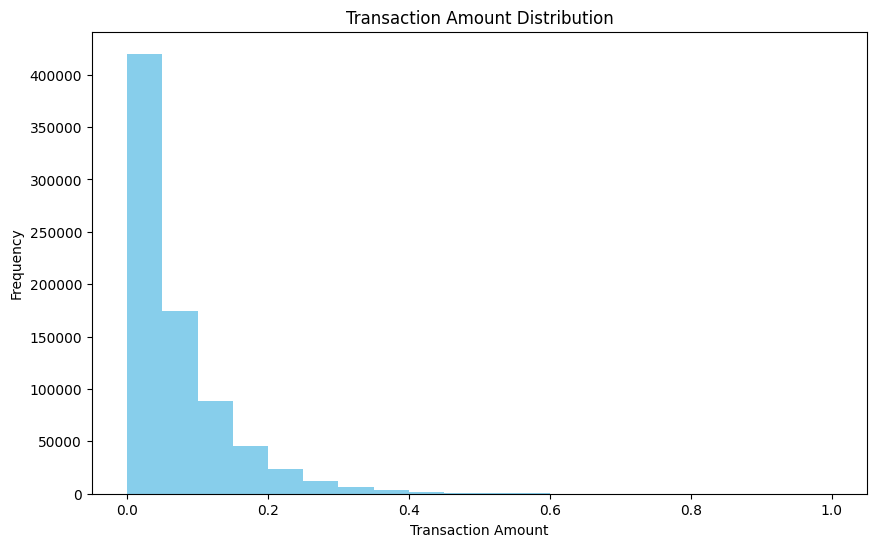

In [76]:
# Histogram for Numerical Data
plt.figure(figsize=(10, 6))
plt.hist(df['transactionAmount'], bins=20, color='skyblue')
plt.title('Transaction Amount Distribution')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()


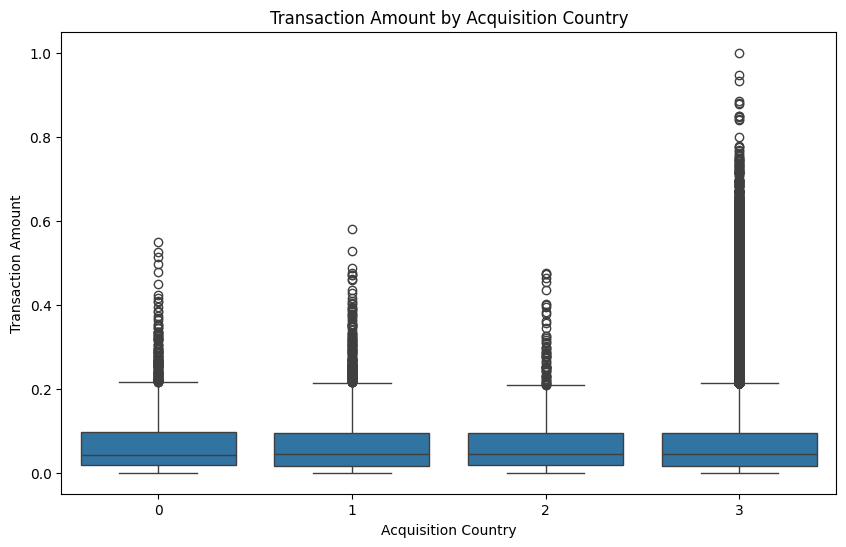

In [77]:

# Box Plot for Numerical Data
plt.figure(figsize=(10, 6))
sns.boxplot(x='acqCountry', y='transactionAmount', data=df)
plt.title('Transaction Amount by Acquisition Country')
plt.xlabel('Acquisition Country')
plt.ylabel('Transaction Amount')
plt.show()


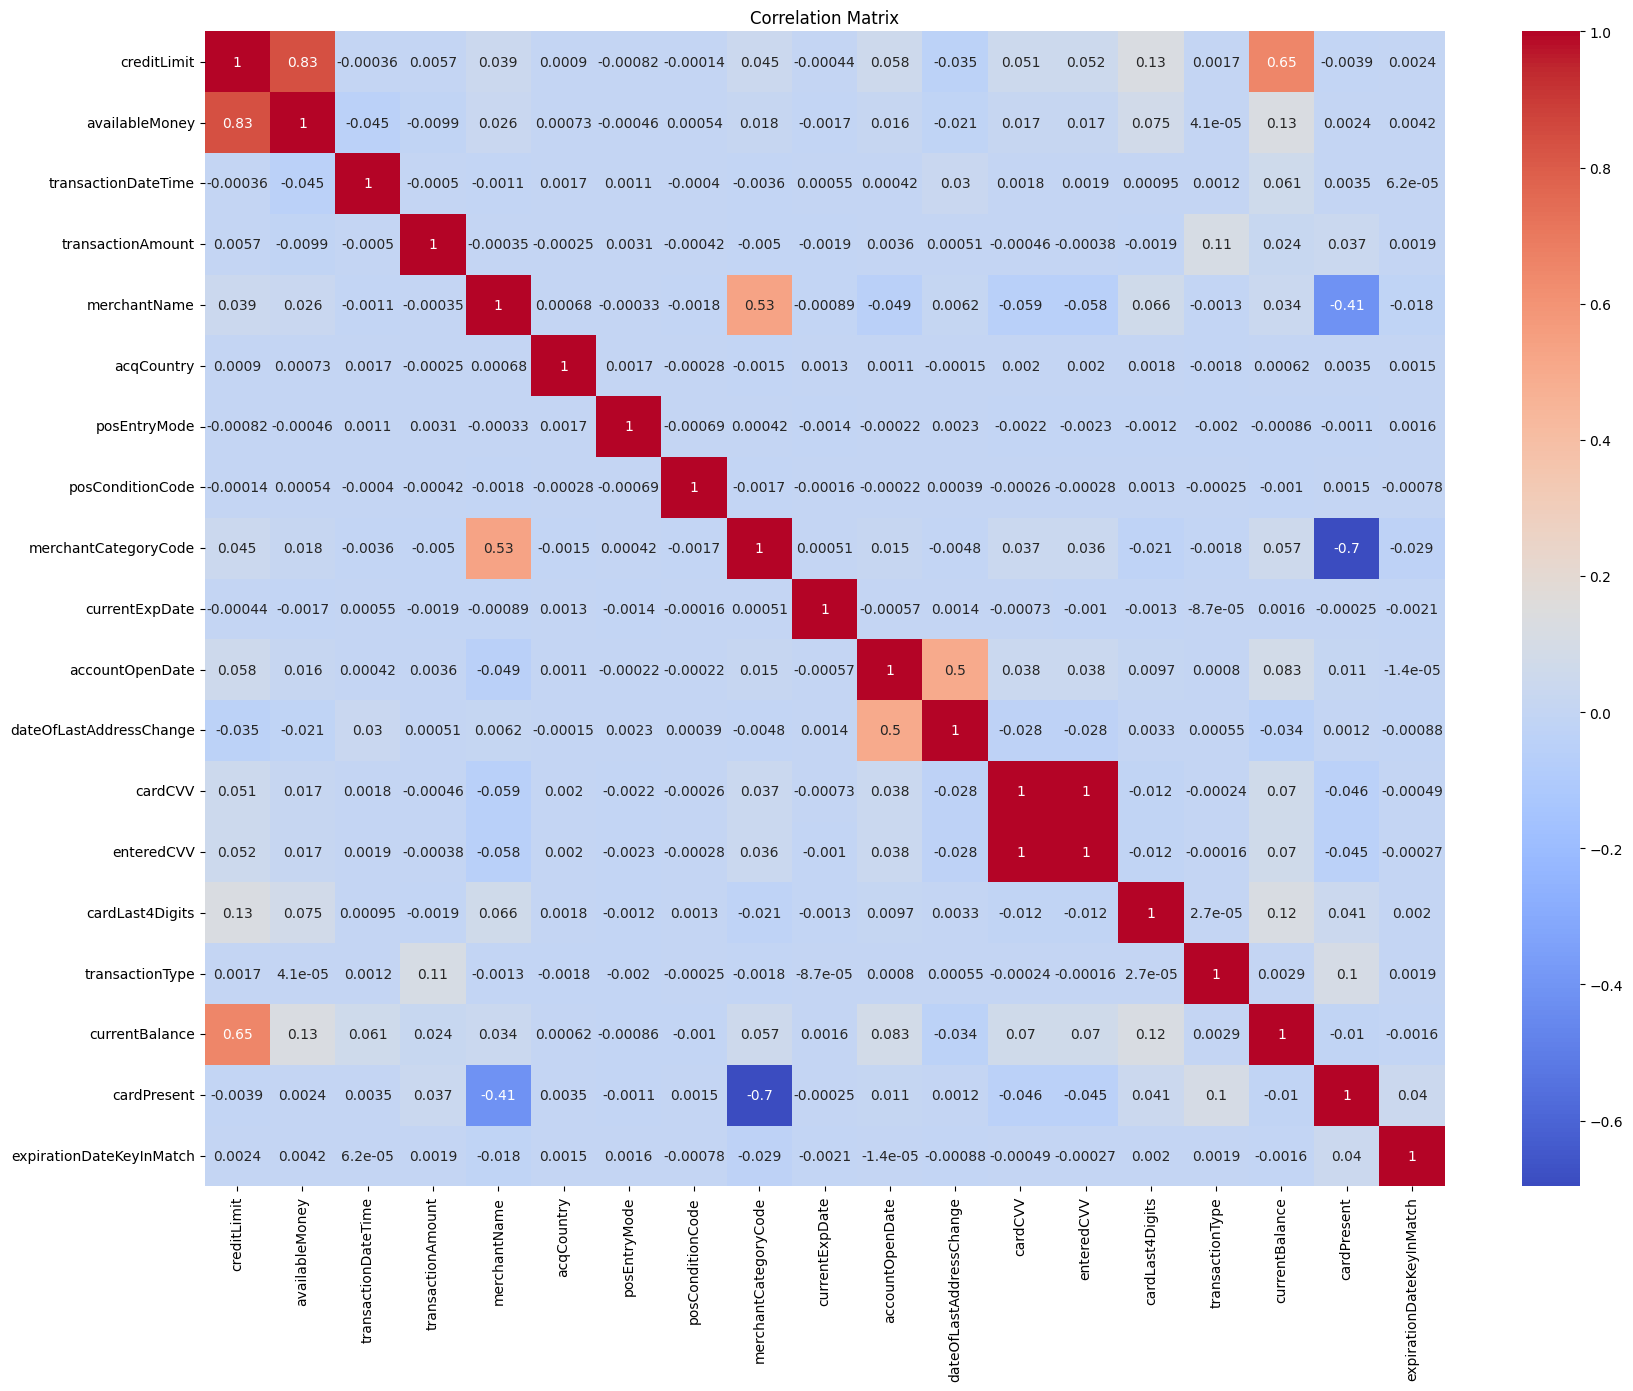

In [78]:


# Heatmap for Correlations
plt.figure(figsize=(20, 15))
df1 = df.drop(["Fraud","merchantCountryCode"], axis=1)
corr_matrix = df1.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [79]:
X = df.drop(["Fraud"], axis=1)
y = df["Fraud"]

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Linear Regression

In [81]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)


y_test_pred = lr.predict(X_test)
y_train_pred = lr.predict(X_train)

In [82]:
test_accuracy = accuracy_score(y_test, y_test_pred)
train_accuracy = accuracy_score(y_train, y_train_pred) 

print(f"Accuracy score of the trainig data: {train_accuracy} ")
print(f"Accuracy score of the test data: {test_accuracy} ")

confusion = confusion_matrix(y_test, y_test_pred)
classification_report_str = classification_report(y_test, y_test_pred)

Accuracy score of the trainig data: 0.9846762816209187 
Accuracy score of the test data: 0.9843992085870876 


In [83]:
confusion

array([[229366,      0],
       [  3635,      0]], dtype=int64)

## Decision Tree

In [85]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

y_test_pred_dt = decision_tree_model.predict(X_test)
y_train_pred_dt = decision_tree_model.predict(X_train)


In [86]:
test_accuracy_dt = accuracy_score(y_test, y_test_pred_dt)
train_accuracy_dt = accuracy_score(y_train, y_train_pred_dt) 

print(f"Accuracy score of the trainig data: {train_accuracy_dt} ")
print(f"Accuracy score of the test data: {test_accuracy_dt} ")

confusion_dt = confusion_matrix(y_test, y_test_pred_dt)
classification_report_str = classification_report(y_test, y_test_pred_dt)

Accuracy score of the trainig data: 1.0 
Accuracy score of the test data: 0.9703134321311926 


In [87]:
confusion_dt

array([[225468,   3898],
       [  3019,    616]], dtype=int64)

## Naive Bayes

In [88]:
from sklearn.naive_bayes import GaussianNB

naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

y_test_pred_nb = naive_bayes_model.predict(X_test)
y_train_pred_nb = naive_bayes_model.predict(X_train)

In [89]:
test_accuracy_nb = accuracy_score(y_test, y_test_pred_nb)
train_accuracy_nb = accuracy_score(y_train, y_train_pred_nb) 

print(f"Accuracy score of the trainig data: {train_accuracy_nb} ")
print(f"Accuracy score of the test data: {test_accuracy_nb} ")

confusion_nb = confusion_matrix(y_test, y_test_pred_nb)
classification_report_str_nb = classification_report(y_test, y_test_pred_nb)

Accuracy score of the trainig data: 0.9846762816209187 
Accuracy score of the test data: 0.9843992085870876 


In [90]:
confusion_nb

array([[229366,      0],
       [  3635,      0]], dtype=int64)

In [91]:
# Convert accuracies to percentage format
test_accuracy_percent = "{:.2%}".format(test_accuracy)
test_accuracy_dt_percent = "{:.2%}".format(test_accuracy_dt)
test_accuracy_nb_percent = "{:.2%}".format(test_accuracy_nb)

# Print the accuracies in percentage format
print(f"Logistic Regression Test Accuracy: {test_accuracy_percent}")
print(f"Decision Tree Test Accuracy: {test_accuracy_dt_percent}")
print(f"Naive Bayes Test Accuracy: {test_accuracy_nb_percent}")


Logistic Regression Test Accuracy: 98.44%
Decision Tree Test Accuracy: 97.03%
Naive Bayes Test Accuracy: 98.44%


[1]: Fraud   [0]: Authentic

In [94]:
# Example input data for testing the model
test_data = {
    'creditLimit': 0.005025,
    'availableMoney': 0.025076,
    'transactionDateTime': '131120161732',  # Ensure the format does not contain '-', ':', or space
    'transactionAmount': 0.003112,
    'merchantName': 1304,
    'acqCountry': 3,
    'merchantCountryCode': 3,
    'posEntryMode': 5.0,
    'posConditionCode': 1.0,
    'merchantCategoryCode': 12,
    'currentExpDate': '01082027',
    'accountOpenDate': '23122021',
    'dateOfLastAddressChange': '04062016',
    'cardCVV': 0.273942,
    'enteredCVV': 0.346693,
    'cardLast4Digits': 0.860372,
    'transactionType': 1,
    'currentBalance': 0.004771,
    'cardPresent': 0,
    'expirationDateKeyInMatch': 0
}


# Create a DataFrame from the test data
test_df = pd.DataFrame([test_data])

# Perform the necessary modifications to 'transactionDateTime' as needed

# Make predictions using the Logistic Regression model
prediction1 = lr.predict(test_df)
prediction2 = decision_tree_model.predict(test_df)
prediction3 = naive_bayes_model.predict(test_df)

In [95]:
print(f"Logistic Regression Prediction: {prediction1}")
print(f"Decision Tree Prediction: {prediction2}")
print(f"Naive Bayes Prediction: {prediction3}")


Logistic Regression Prediction: [0]
Decision Tree Prediction: [0]
Naive Bayes Prediction: [0]
